In [1]:
# uncomment this line if you want to use interactive plot (only works in Jupyter but not in VScode)
# %matplotlib ipympl

import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd
from joblib import Parallel, delayed


import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D
import scanpy as sc
import numpy as np
import pandas as pd

import scSLAT
from scSLAT.model import Cal_Spatial_Net, load_anndatas, run_SLAT_mlp2, spatial_match
from scSLAT.viz import match_3D_multi, hist, Sankey
from scSLAT.metrics import region_statistics

In [2]:
import scanpy as sc
import os
file_path_1 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151674')
adata_1 = sc.read_visium(path=file_path_1, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_1.var_names_make_unique(join="++")
# output_file_path_1 = r"D:\ppppaper\data\DLPFC\DLPFC\151507\filtered_feature_bc_matrix.h5ad"
# adata_1.write(output_file_path_1)
# adata_1

Ann_df_1 = pd.read_csv(os.path.join(file_path_1 , '151674_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_1.loc[Ann_df_1['Layer'].isna(),'Layer'] = "unknown"
adata_1.obs['annotation'] = Ann_df_1.loc[adata_1.obs_names, 'Layer'].astype('category')

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
file_path_2 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151675')
adata_2 = sc.read_visium(path=file_path_2, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_2.var_names_make_unique(join="++")
# output_file_path_2 = r"D:\ppppaper\data\DLPFC\DLPFC\151669\filtered_feature_bc_matrix.h5ad"
# adata_2.write(output_file_path_2)
# adata_2

Ann_df_2 = pd.read_csv(os.path.join(file_path_2 , '151675_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_2.loc[Ann_df_2['Layer'].isna(),'Layer'] = "unknown"
adata_2.obs['annotation'] = Ann_df_2.loc[adata_2.obs_names, 'Layer'].astype('category')

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
import torch


x1_coords=adata_1.obsm['spatial'][:,0]
y1_coords=adata_1.obsm['spatial'][:,1]
x2_coords=adata_2.obsm['spatial'][:,0]
y2_coords=adata_2.obsm['spatial'][:,1]
locations_1 = np.array([x1_coords, y1_coords])
locations_2 = np.array([x2_coords, y2_coords])

locations_1_tensor = torch.tensor(locations_1)
locations_2_tensor = torch.tensor(locations_2)
locations_1_tensor = locations_1_tensor.transpose(0, 1)
locations_1_tensor = locations_1_tensor.to(dtype=torch.float32)
locations_2_tensor = locations_2_tensor.transpose(0, 1)
locations_2_tensor = locations_2_tensor.to(dtype=torch.float32)
location = [locations_1_tensor, locations_2_tensor]

location

[tensor([[ 9733.,  8533.],
         [ 5713.,  2873.],
         [ 4011.,  9569.],
         ...,
         [ 4574.,  7896.],
         [ 5513., 11257.],
         [ 6261.,  3356.]]),
 tensor([[ 3834.,  2566.],
         [ 9711.,  8599.],
         [ 3989.,  9635.],
         ...,
         [ 4745.,  9761.],
         [ 4552.,  7962.],
         [ 5491., 11324.]])]

In [5]:
Cal_Spatial_Net(adata_1, k_cutoff=10, model='KNN')
Cal_Spatial_Net(adata_2, k_cutoff=10, model='KNN')

Calculating spatial neighbor graph ...
The graph contains 38433 edges, 3673 cells.
10.463653689082493 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 37544 edges, 3592 cells.
10.452115812917596 neighbors per cell on average.


In [6]:
edges, features = load_anndatas([adata_1, adata_2], feature='DPCA')

Use DPCA feature to format graph


d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
from scSLAT.model.utils import run_SLAT


embd0, embd1, time = run_SLAT_mlp2(features, edges, location)

GPU is not available
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 17.41


In [8]:
embd2, embd3, time2 = run_SLAT(features, edges)

GPU is not available
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 41.48


In [9]:
best, index, distance = spatial_match(features, adatas=[adata_1,adata_2], reorder=False)

In [10]:
adata_1.obsm['scSLAT_bks'] = embd0.detach().cpu().numpy()
adata_2.obsm['scSLAT_bks'] = embd1.detach().cpu().numpy()

adata_com=sc.concat([adata_1,adata_2], label= 'slice_name', keys= ['slice_1','slice_2'])

sc.pp.neighbors(adata_com, use_rep= 'scSLAT_bks')
sc.tl.umap(adata_com,)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
d:\Anaconda\envs\scSLAT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
adata_1.obsm['scSLAT'] = embd2.detach().cpu().numpy()
adata_2.obsm['scSLAT'] = embd3.detach().cpu().numpy()

adata_com_2=sc.concat([adata_1,adata_2], label= 'slice_name', keys= ['slice_1','slice_2'])

sc.pp.neighbors(adata_com_2, use_rep= 'scSLAT')
sc.tl.umap(adata_com_2,)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [21]:
embd0.shape

torch.Size([3673, 256])

d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


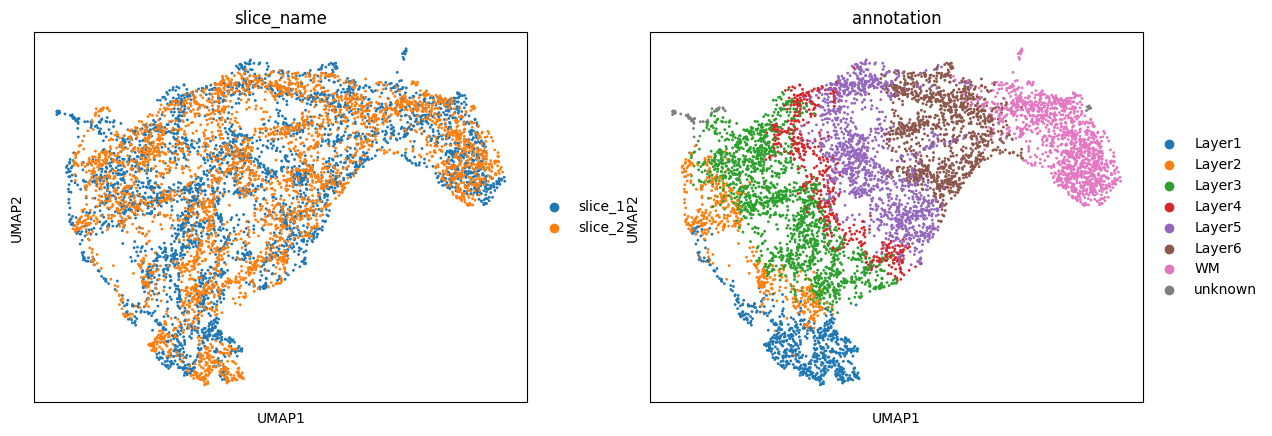

In [13]:
sc.pl.umap(adata_com, color= ['slice_name', 'annotation'])

d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


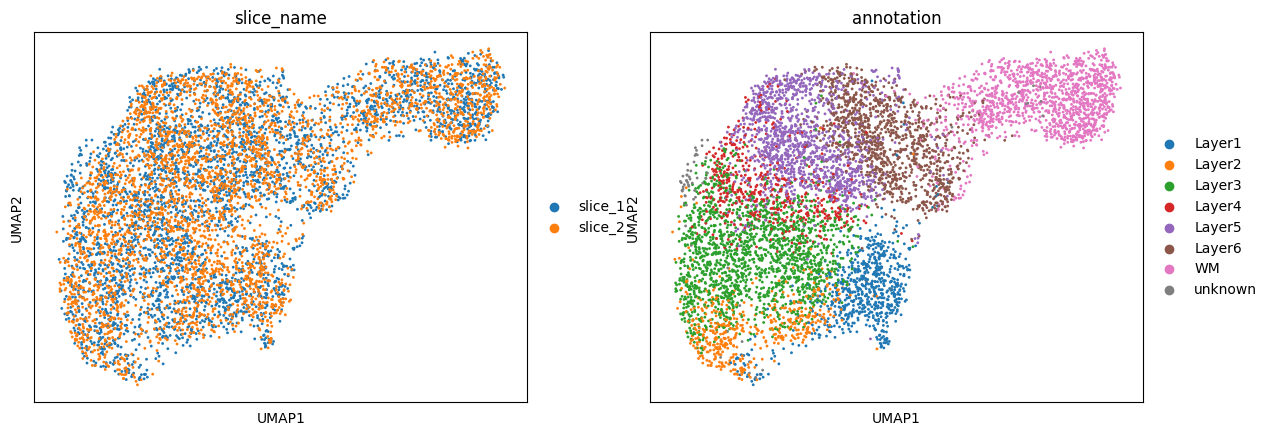

In [14]:
sc.pl.umap(adata_com_2, color= ['slice_name','annotation'])

In [19]:
adata1_df = pd.DataFrame({'index': range(embd0.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata2_df = pd.DataFrame({'index': range(embd1.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]

dataset1: 8 cell types; dataset2: 8 cell types; 
                    Total :8 celltypes; Overlap: 8 cell types 
                    Not overlap :[[]]
Subsampled 300 pairs from 3592
Count of matches with equal cell types: 1
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 2
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 3
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 4
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 5
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 6
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 7
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 8
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 8
Count of matches with not equal cell types: 1
Count of matches with equal

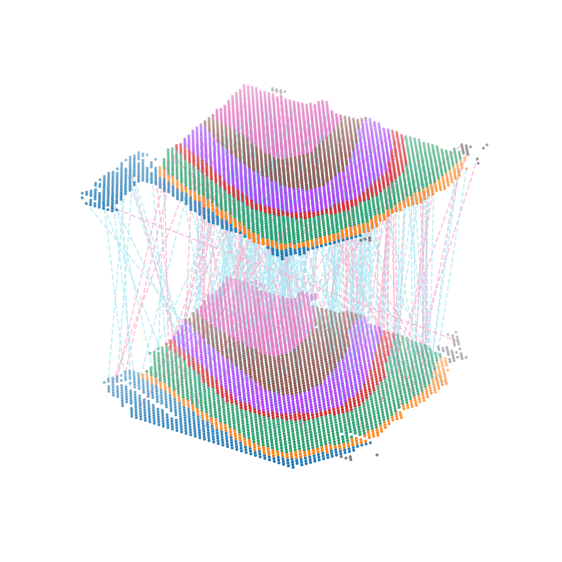

In [20]:
multi_align = match_3D_multi(adata1_df, adata2_df, matching,meta='celltype',
                            scale_coordinate=True, subsample_size=300)
multi_align.draw_3D(size=[7, 8], line_width=1, point_size=[1.5,1.5], hide_axis=True)

In [17]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_3 = adata_2.obs['annotation'].to_numpy()

best, index, distance = spatial_match([embd0, embd1], adatas=[adata_1, adata_2], reorder=False)

valid_indices = best < true_labels_1.size
valid_best = best[valid_indices]
valid_indices = np.arange(len(best))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_3[valid_indices]

# # 打印对齐后的标签长度
# print(f"Length of aligned_true_labels_1: {aligned_true_labels_1.size}")
# print(f"Length of matched_labels_3: {matched_labels_3.size}")

# # 打印对齐后的索引和标签
# print("Valid best indices and their corresponding labels in true_labels_1:")
# for idx, label in zip(valid_best, aligned_true_labels_1):
#     print(f"Index: {idx}, Label: {label}")

# print("Valid indices in true_labels_3 and their corresponding labels:")
# for idx, label in zip(valid_indices, matched_labels_3):
#     print(f"Index: {idx}, Label: {label}")

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')


ARI: 0.6718032208525452, NMI: 0.7044849059877929


In [18]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_3 = adata_2.obs['annotation'].to_numpy()

best, index, distance = spatial_match([embd2, embd3], adatas=[adata_1, adata_2], reorder=False)

valid_indices = best < true_labels_1.size
valid_best = best[valid_indices]
valid_indices = np.arange(len(best))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_3[valid_indices]

# # 打印对齐后的标签长度
# print(f"Length of aligned_true_labels_1: {aligned_true_labels_1.size}")
# print(f"Length of matched_labels_3: {matched_labels_3.size}")

# # 打印对齐后的索引和标签
# print("Valid best indices and their corresponding labels in true_labels_1:")
# for idx, label in zip(valid_best, aligned_true_labels_1):
#     print(f"Index: {idx}, Label: {label}")

# print("Valid indices in true_labels_3 and their corresponding labels:")
# for idx, label in zip(valid_indices, matched_labels_3):
#     print(f"Index: {idx}, Label: {label}")

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')


ARI: 0.550558483650387, NMI: 0.5797999061309662
